In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier #importing decision tree classifier
from sklearn.model_selection import train_test_split #importing train_test_split function
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
from sklearn.ensemble import BaggingClassifier#bagging combines the results of multipls models to get a generalized result. 
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
fraud = pd.read_csv("Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [5]:
fraud['Risky_1'] = fraud['Taxable.Income'].map(lambda x: 1 if x <= 30000 else 0)

In [6]:
fraud['Undergrad']=fraud['Undergrad'].astype('category')

In [7]:
fraud['Marital.Status']=fraud['Marital.Status'].astype('category')

In [8]:
fraud['Urban']=fraud['Urban'].astype('category')

In [9]:
fraud.dtypes

Undergrad          category
Marital.Status     category
Taxable.Income        int64
City.Population       int64
Work.Experience       int64
Urban              category
Risky_1               int64
dtype: object

In [10]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risky_1
0,NO,Single,68833,50047,10,YES,0
1,YES,Divorced,33700,134075,18,YES,0
2,NO,Married,36925,160205,30,YES,0
3,YES,Single,50190,193264,15,YES,0
4,NO,Married,81002,27533,28,NO,0


In [11]:
#label encoding to convert categorical values into numeric.
fraud['Undergrad']=fraud['Undergrad'].cat.codes

In [12]:
fraud['Urban']=fraud['Urban'].cat.codes

In [13]:
fraud['Marital.Status']=fraud['Marital.Status'].cat.codes

In [14]:
feature_cols=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']

In [15]:
x = fraud[feature_cols]
y = fraud.Risky_1

In [16]:
print(x)
print(y)

     Undergrad  Marital.Status  City.Population  Work.Experience  Urban
0            0               2            50047               10      1
1            1               0           134075               18      1
2            0               1           160205               30      1
3            1               2           193264               15      1
4            0               1            27533               28      0
..         ...             ...              ...              ...    ...
595          1               0            39492                7      1
596          1               0            55369                2      1
597          0               0           154058                0      1
598          1               1           180083               17      0
599          0               0           158137               16      0

[600 rows x 5 columns]
0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Risky_1

In [17]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.20,random_state=1)

In [18]:
fraudmodel =  BaggingClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) 

In [19]:
fraudmodel = fraudmodel.fit(x_train,y_train) #train decision tree
y_predict = fraudmodel.predict(x_test)

In [20]:
print("Accuracy : ", accuracy_score(y_test,y_predict)*100 )
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

Accuracy :  80.0
[[96  1]
 [23  0]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89        97
           1       0.00      0.00      0.00        23

    accuracy                           0.80       120
   macro avg       0.40      0.49      0.44       120
weighted avg       0.65      0.80      0.72       120



In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

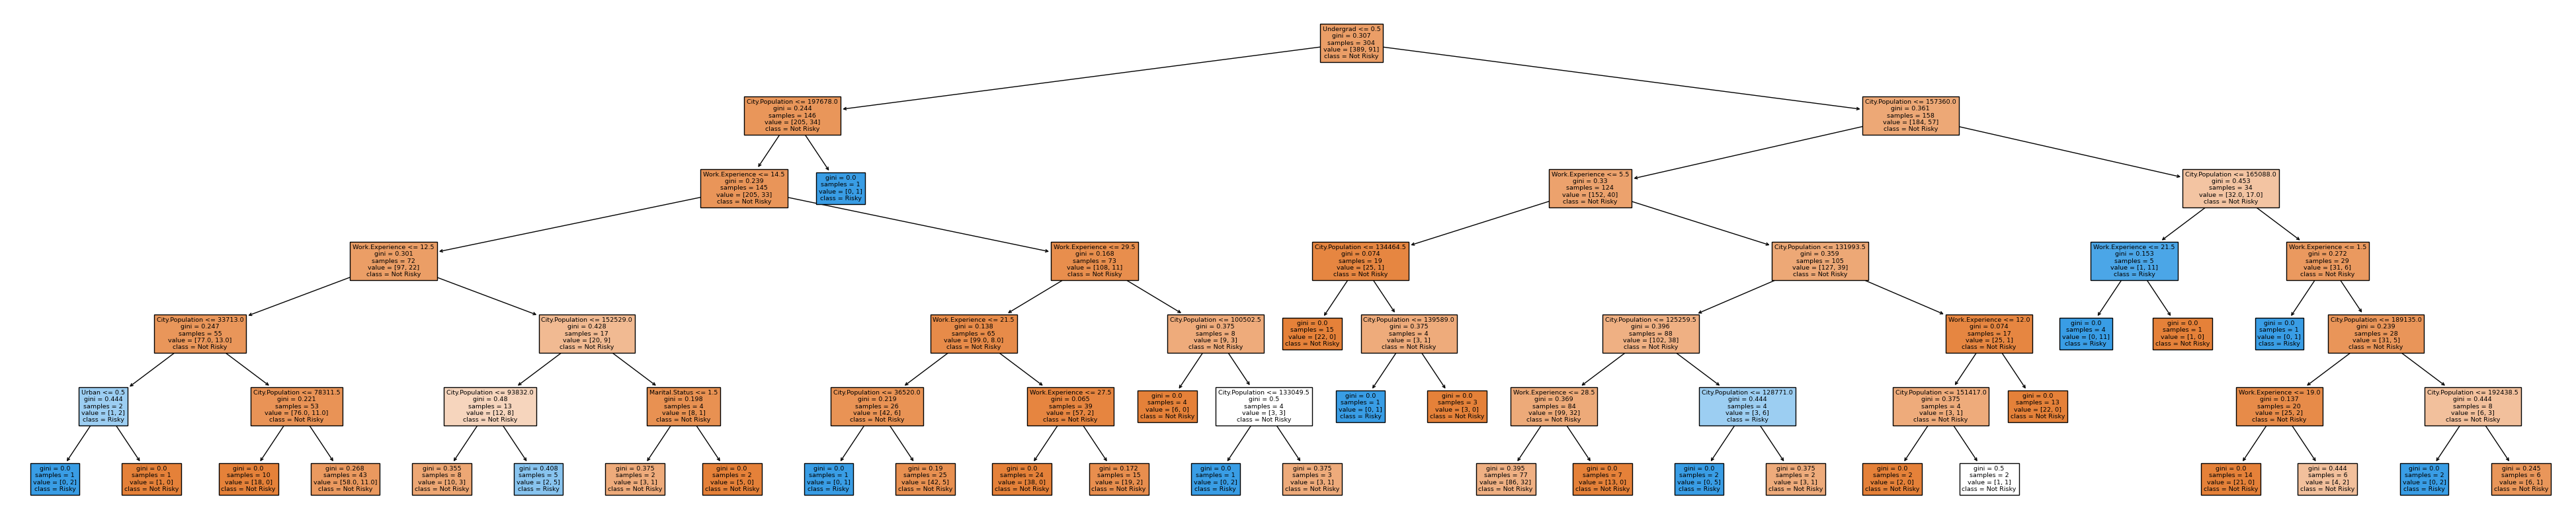

In [26]:
# Access the decision tree estimator from the bagging classifier
decision_tree_model = fraudmodel.estimators_[0]  # Assuming the decision tree is the first estimator in the bagging ensemble

# Visualize the decision tree
plt.figure(figsize=(50, 10))
plot_tree(decision_tree_model, feature_names=feature_cols, class_names=["Not Risky", "Risky"], filled=True)
plt.show()



In [ ]:
## From the classification report, we can see that the model has high precision 
#for class 0 (Not Risky), but very low recall and F1-score for class 1 (Risky).
# This indicates that the model is good at identifying non-risky cases,
#but performs poorly in detecting risky cases.
